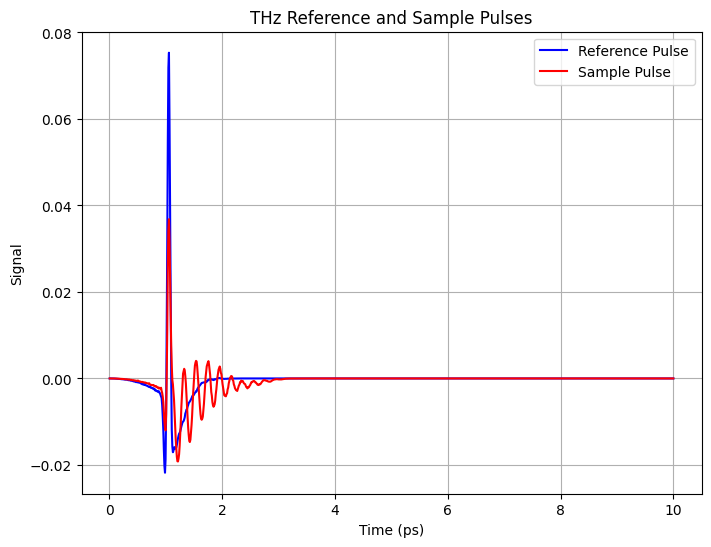

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os 
import sys 
src_path = os.path.abspath("../src")  # Update the path if the structure is different
if src_path not in sys.path:
    sys.path.append(src_path)
# Constants
c = 3e8  # Speed of light in vacuum (m/s)
epsilon_0 = 8.854e-12  # Permittivity of free space (F/m)
# Relative data folder
data_folder =  "../processed_dataDec1"  
reference_file = os.path.join(data_folder, "Processed_Reference.d24")
sample_file = os.path.join(data_folder, "Processed_Sample.d24")

if not os.path.exists(reference_file):
    raise FileNotFoundError(f"Reference.d24 not found in: {reference_file}")
if not os.path.exists(sample_file):
    raise FileNotFoundError(f"Sample.d24 not found in: {sample_file}")


# Function to read and process .d24 files
def read_d24_file(file_name):
    with open(file_name, 'r') as file:
        lines = file.readlines()
    start_line = next(i for i, line in enumerate(lines) if line.lstrip()[0].isdigit())
    data_lines = lines[start_line:]
    return pd.DataFrame(
        [list(map(float, line.split())) for line in data_lines],
        columns=["Time (ps)", "Signal"]
    )[["Time (ps)", "Signal"]]

# Load data
reference_data = read_d24_file(reference_file)
sample_data = read_d24_file(sample_file)
reference_signal = reference_data["Signal"] 
sample_signal = sample_data["Signal"] 

plt.figure(figsize=(8, 6))
plt.plot(sample_data["Time (ps)"], reference_data["Signal"], label="Reference Pulse", color='blue')
plt.plot(sample_data["Time (ps)"], sample_data["Signal"], label="Sample Pulse", color='red')
plt.title("THz Reference and Sample Pulses")
plt.xlabel("Time (ps)")
plt.ylabel("Signal")
plt.grid(True)
plt.legend()
plt.show()


[ 0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8
  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2
  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6
  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.
  7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4
  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8
  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1 11.2
 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5 12.6
 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9 14.
 14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3 15.4
 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7 16.8
 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1 18.2
 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5 19.6
 19.7 19

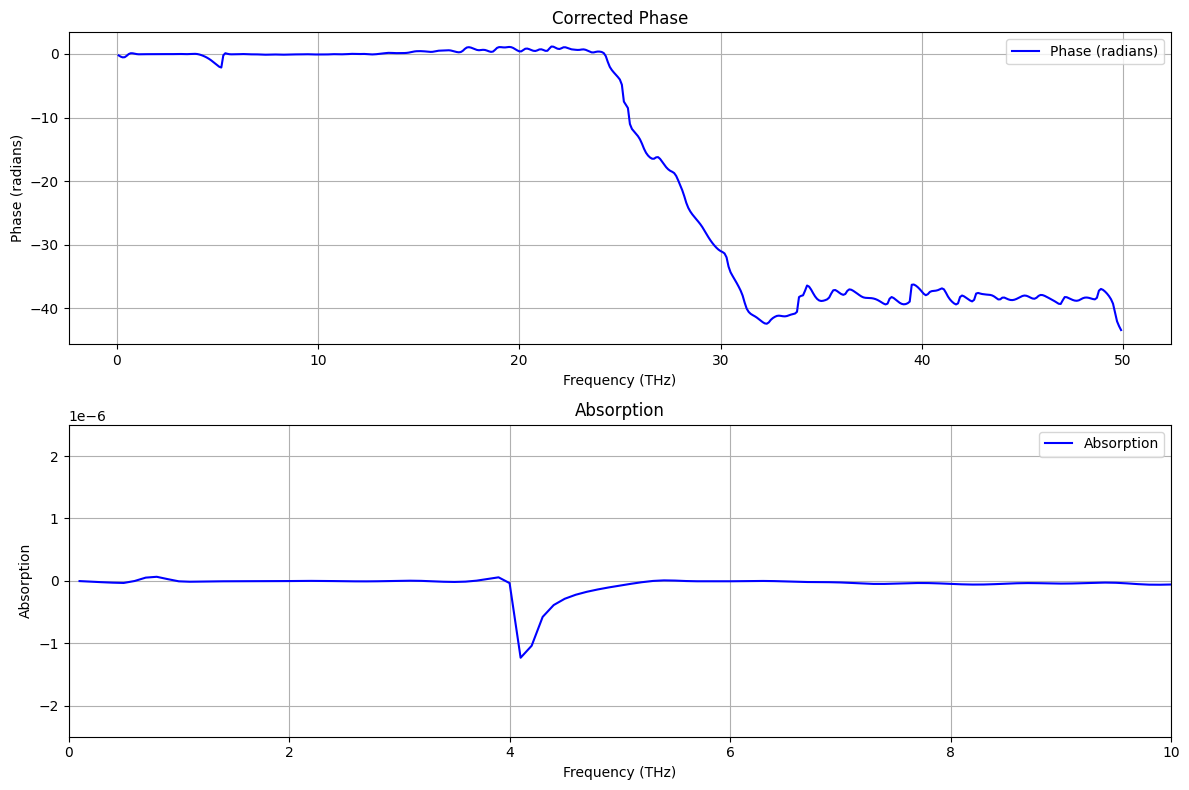

In [2]:

from utils import absorption_coefficient,phase_and_amplitude
time = sample_data["Time (ps)"]
dt = sample_data["Time (ps)"].iloc[1]-sample_data["Time (ps)"].iloc[0]
ref_fft = np.fft.fft(reference_signal)
sample_fft = np.fft.fft(sample_signal)
freqs = np.fft.fftfreq(len(time), d=dt) 

positive_idx = np.where(freqs > 0)
freqs = freqs[positive_idx]
ref_fft = ref_fft[positive_idx]
sample_fft = sample_fft[positive_idx]
freqs_for_fit =  (0.1, 10.0) 
phase, R_amp =phase_and_amplitude(freqs, sample_fft, ref_fft,sample_signal , reference_signal, freqs_for_fit)
absorption = absorption_coefficient(phase, R_amp, freqs)

plt.figure(figsize=(12, 8))

# Phase Plot
plt.subplot(2, 1, 1)
plt.plot(freqs, phase, label="Phase (radians)", color='blue')
plt.title("Corrected Phase")
plt.xlabel("Frequency (THz)")
plt.ylabel("Phase (radians)")
plt.legend()
plt.grid(True)

# Absorption Plot
plt.subplot(2, 1, 2)
plt.plot(freqs, absorption, label="Absorption", color='blue')
plt.xlim(0, 10)
plt.ylim(-0.25e-5, 0.25e-5)
plt.title("Absorption")
plt.xlabel("Frequency (THz)")
plt.ylabel("Absorption")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



https://journals.sagepub.com/doi/epub/10.1177/00037028221133404